# Daily Forecast

In [1]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt

# Modeling Package
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('daily10.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15130 entries, 0 to 15129
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    15130 non-null  object 
 1   DGS10   15130 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.6+ KB


In [5]:
df.columns = ['ds', 'y']
list(df.columns.values)

['ds', 'y']

In [6]:
df.head()

,ds,y
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03


In [7]:
df.tail()

,ds,y
15125,2022-07-25,2.81
15126,2022-07-26,2.81
15127,2022-07-27,2.78
15128,2022-07-28,2.68
15129,2022-07-29,2.67


In [8]:
df.describe()

,y
count,15130.000000
mean,5.918515
std,2.991581
min,0.520000
25%,3.900000
50%,5.720000
75%,7.670000
max,15.840000


In [9]:
m = NeuralProphet(learning_rate=0.1)    

In [10]:
metrics = m.fit(df, freq="D")

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 92
Epoch[92/92]: 100%|█| 92/92 [00:28<00:00,  3.27it/s, SmoothL1Loss=0.00206, MAE=0


In [11]:
future = m.make_future_dataframe(df=df, periods=30)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [12]:
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


In [13]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2022-07-30,None,4.338991,NaN,2.990780,0.051346,1.296865
1,2022-07-31,None,8.198095,NaN,2.990573,0.049340,5.158182
2,2022-08-01,None,1.753697,NaN,2.990366,0.047262,-1.283931
3,2022-08-02,None,1.736718,NaN,2.990160,0.045118,-1.298561
4,2022-08-03,None,1.736084,NaN,2.989953,0.042914,-1.296783


### Plotting

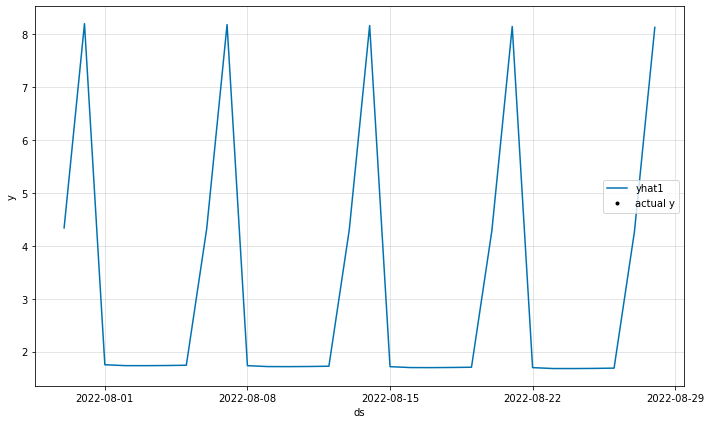

In [14]:
fig_forecast = m.plot(forecast)

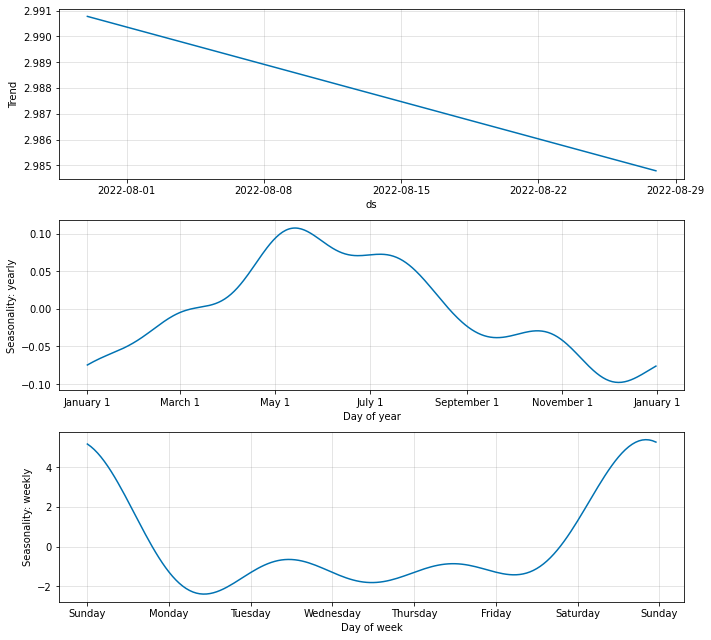

In [15]:
fig_comp = m.plot_components(forecast)

#### The financial markets are not open on the weekend, and there is less economic activity in the winter months so the above lineplots are reasonable.  

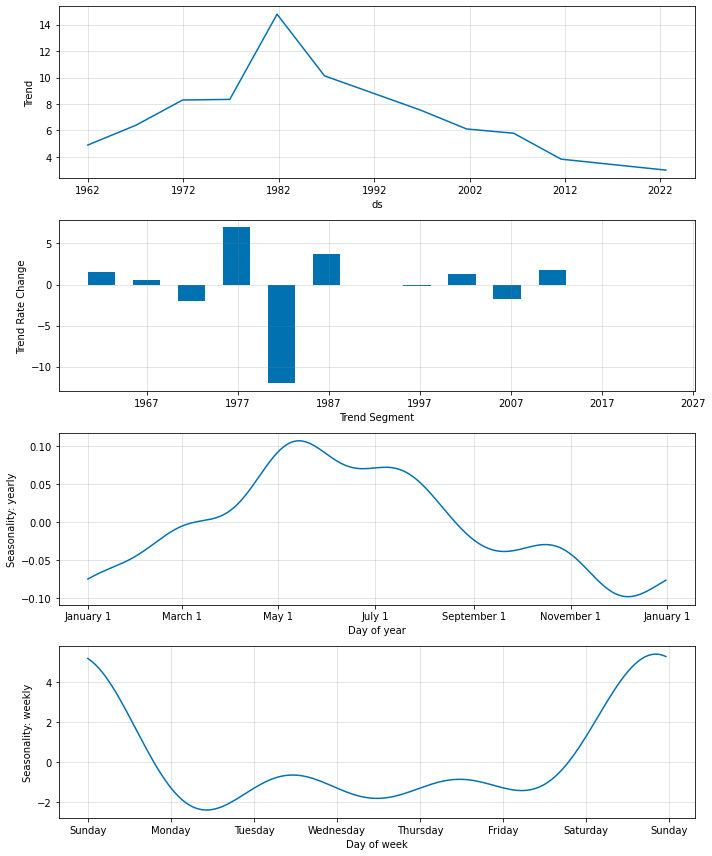

In [16]:
fig_param = m.plot_parameters()

## Validation

In [17]:
# Manual Split
m = NeuralProphet()
df_train, df_test = m.split_df(df, valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.578% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B


In [18]:
train_metrics = m.fit(df_train)
test_metrics = m.test(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.547% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 98


  0%|          | 0/152 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.96E-02, min: 2.46E+00


  0%|          | 0/152 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.96E-02, min: 2.46E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.59E-02
Epoch[98/98]: 100%|█| 98/98 [00:24<00:00,  3.96it/s, SmoothL1Loss=0.00233, MAE=0
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.671% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.003  0.670  0.794


In [19]:
# Builtin Function

m = NeuralProphet()
metrics = m.fit(df_train, validation_df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.547% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 98


  0%|          | 0/152 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.94E-02, min: 2.46E+00


  0%|          | 0/152 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.94E-02, min: 2.82E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.84E-02
Epoch[98/98]: 100%|█| 98/98 [00:25<00:00,  3.90it/s, SmoothL1Loss=0.00233, MAE=0


Text(0.5, 1.0, 'Model Loss (MAE) with Daily Frequency')

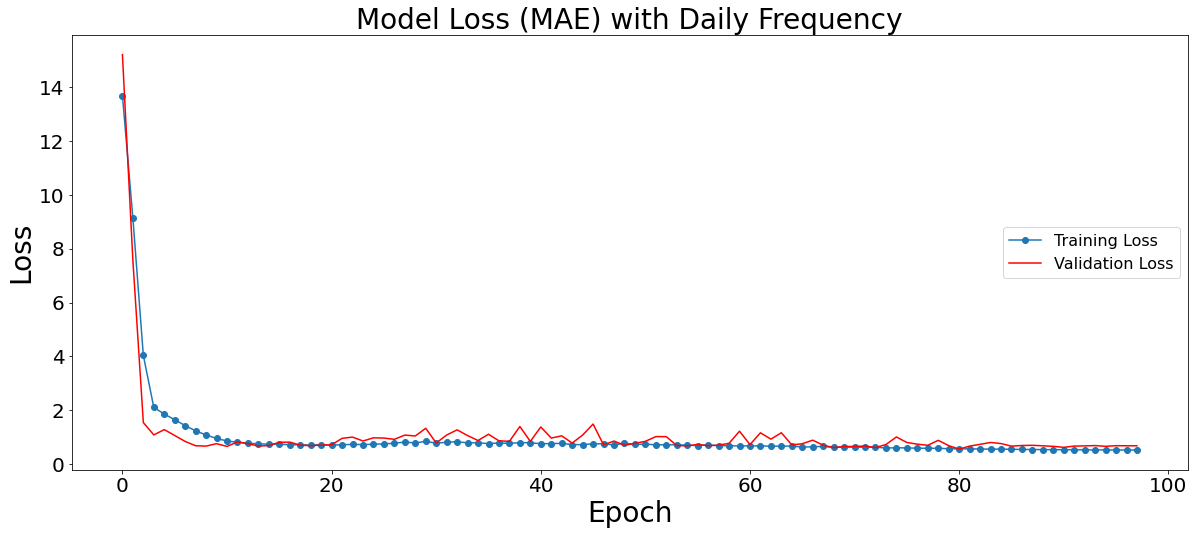

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE) with Daily Frequency", fontsize=28)